# Chapter06 代表的な離散型確率分布

- 推測統計
  - 限られた標本から母集団の平均や分散といった指標を推定することが目的
- ノンパラメトリックな手法
  - 母集団の確率分布の形状に何も仮定を置かず、指標を推定する方法
- パラメトリックな手法
  - 母集団の確率分布にある程度仮定を置いて、確率分布の期待値や分散を決める少数のパラメータのみを推定する方法

In [62]:
# ライブラリーの準備
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
from ipywidgets import interact

plt.style.use('seaborn')
rcParams['font.family'] = 'IPAexgothic'
%precision 3
%matplotlib inline


In [63]:
# グラフの線の種類
linestyles = ['-', '--', ':']

# 関数の定義
def E(x, g=lambda x: x):
    """期待値の関数"""
    x_set, f = X
    return np.sum(
        [g(x_k) * f(x_k) 
        for x_k in x_set]
    )

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum(
        [g(x_k - mean)**2 * f(x_k)
        for x_k in x_set]
    )

def check_prob(X):
    """確率変数を引数に、
    その確率変数が確率の性質を満たしているか確認し、
    期待値と分散を返す関数
    """
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), "負の確率があります。"

    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f"確率の和が{prob_sum}になりました。"

    print(f"期待値: {E(X):.4}")
    print(f"分散: {V(X):.4}")

def plot_prob(X):
    """確率変数を引数に、
    その確率変数の確率関数と期待値を図示するための関数
    """
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='red')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()

    plt.show()


## 6.1 ベルヌーイ分布（Bernoulli distribution）

- とりうる値が「0」と「1」しかない確率分布
- ベルヌーイ分布に従う確率変数の試行を、「ベルヌーイ試行」という
- ベルヌーイ試行
  - 「1」が出ることを「成功」
  - 「0」が出ることを「失敗」
- ベルヌーイ分布
  - 「1」が出る確率を「$p$」
  - 「0」が出る確率「$1-p$」

### ベルヌーイ分布 $Bern(p)$の確率関数

$0 \leq p \leq 1$

$$
f(x) = 
\begin{cases}
p^x(1 - p)^{(1-x)} ~~~ (x \in \{0, 1\}) \\
0 ~~~~~~~~~~~~~~~~~~~~~~~~ (otherwise)
\end{cases}
$$

- この関数に「1」を代入すると、「$p$」が返り、
- 「0」を代入すると、「$1 - p$」が返る。

**コインを投げて表が出るかどうか**

- 表と裏が出る確率が等しいふつうのコインを投げて、
- 「表」が出たら「1」、「裏」が出たら「0」とする確率変数$X$は、
- $Bern(1/2)$に従う。

このことからコインを投げて表が出る確率は、

$$
P(X = 1) = (1/2)^1 * (1 - 1/2)^{(1 - 1)} = 1/2
$$

と求めることができる。

**サイコロを1回振って、「出目6」が出るかどうか**

- すべての出目が出る確率が等しいふつうのサイコロを振って、
- 「出目6」が出たら「1」、「それ以外」なら「0」とする確率変数$X$は、
- $Bern(1/6)$に従う。

このことからサイコロを振って「出目6」が出ない確率は、

$$
P(X = 0) = (1/6)^0 * (1 - 1/6)^{1 - 0} = 5/6
$$

と求めることができる。

### ベルヌーイ分布の期待値と分散

$X \sim Bern(p)$とするとき、

$$
\begin{align*}
E(X) &= p \\
V(X) &= p(1 -p)
\end{align*}
$$

In [64]:
def Bern(p):
    """ベルヌーイ分布
    パラメータpを引数に、x_setとfを返す関数
    """
    x_set = np.array([0, 1])
    def f(x):
        """ベルヌーイ分布の確率関数"""
        if x in x_set:
            return p**x * (1 - p)**(1 - x)
        else:
            return 0
    return x_set, f

In [65]:
# Bern(0.3)に従う確率変数Xを作成する
p = 0.3
X = Bern(p)
X

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [66]:
# Bern(0.3)に従う確率変数Xの期待値と分散
check_prob(X)

期待値: 0.3
分散: 0.21


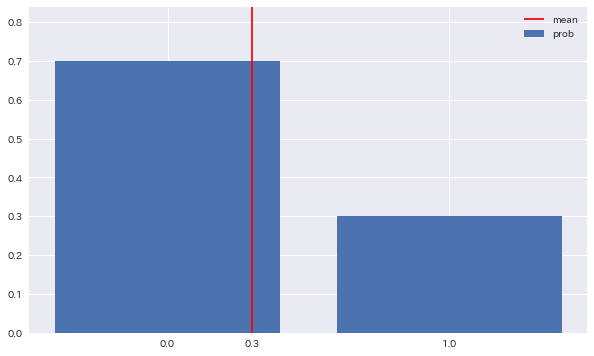

In [67]:
# Bern(0.3)に従う確率変数Xを図示する
plot_prob(X)

In [68]:
# scipy.statsを使った実装
# rv(random variable, 確率変数)
p = 0.3
rv = stats.bernoulli(p)

In [69]:
# pmf()メソッドは、確率関数を計算できる
rv.pmf(0), rv.pmf(1)

(0.700, 0.300)

In [70]:
# pmf()メソッドに、リストを渡す、Numpy.arrayが返ってくる
rv.pmf([0, 1])

array([0.7, 0.3])

In [71]:
# cdf()メソッドで、累積密度関数を計算する
rv.cdf([0, 1])

array([0.7, 1. ])

In [72]:
# mean()メソッド、var()メソッド
rv.mean(), rv.var()

(0.300, 0.210)

### ベルヌーイ分布のまとめ

|||
|:--:|:--:|
|パラメータ|$p$|
|とりうる値|$\{0, 1\}$|
|確率関数|$p^x(1-p)^{1-x}$|
|期待値|$p$|
|分散|$p(1-p)$|
|scipy.stats|bernoulli(p)|

## 6.2 二項分布（binomial distribution）

- 二項分布
  - 成功確率が$p$のベルヌーイ試行を$n$回行ったときの成功回数が従う分布
  - 「成功する回数」は、「0回から$n$回」
  - 「とりうる値」は、「$\{0, 1, ..., n\}$」
- 二項分布のパラメータ
  - 成功確率 $p ~~~ (0 \leq p \leq 1)$
  - 試行回数 $n ~~~ (n \geq 1)$ 整数

### 二項分布 $Bin(n, p)$の確率関数

$$
f(x) = 
\begin{cases}
\begin{align*}
{}_n C_x p^x (1 - p)^{(n - x)} ~~~ &(x \in \{0, 1, ..., n\})
\\
0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ &(otherwise)
\end{align*}
\end{cases}
$$

#### コンビネーション ${}_n C_x$

- $n$個の異なるものの中から、$x$個を選んで「できる組み合わせの数」

$$
{}_n C_x = \dfrac{n!}{x!(n-x)!}
$$

&nbsp;

$$
{}_6 C_2 = \dfrac{6!}{2!4!} = \dfrac{6*5*4*3*2}{2*4*3*2} = 15
$$

10回コインを投げて、表が出る回数

- $p = 1/2$のベルヌーイ試行を10回行ったときの成功回数と考えることができるので、
- $Bin(10, 1/2)$に従う。

コインを10回投げて、表が3回出る確率は、

$$
P(X = 3) = {}_{10} C_3 (1/2)^3 (1 - 1/2)^{10-3} = 15/128
$$

と求めることができる。

4回サイコロを振って、出目6が出る回数

- $p = 1/6$のベルヌーイ試行を4回行ったときの成功回数と考えることができるので、
- $Bin(4, 1/6)$に従う。

4回サイコロを振って、出目6が1回も出ない確率は、

$$
P(X = 0) = {}_4 C_0 (1/6)^0 (1 - 1/6)^{(4-0)} = 625/1296
$$

と求めることができる。

### 二項分布の期待値と分散

$X \sim Bin(n, p)$とするとき

$$
\begin{align*}
E(X) &= np \\
V(X) &= np(1 -p)
\end{align*}
$$

In [73]:
# コンビネーションn_C_xの計算は
# scipy.specialにある、comb()関数を使う
from scipy.special import comb

def Bin(n, p):
    """二項分布
    パラメータ(n, p)を引数に、x_setとfを返す関数
    """
    x_set = np.arange(n+1)
    def f(x):
        """二項分布の確率関数"""
        if x in x_set:
            return comb(n, x) * p**x * (1 - p)**(n-x)
        else:
            return 0
    return x_set, f

In [74]:
# Bin(10, 0.3)に従う確率変数Xを作成する
n = 10
p = 0.3
X = Bin(n , p)
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

In [75]:
# Bin(10, 0.3)に従う確率変数Xの
# 期待値 = 10 * 0.3 = 3.0
# 分散 = 10 * 0.3 * 0.7 = 2.1
check_prob(X)

期待値: 3.0
分散: 2.1


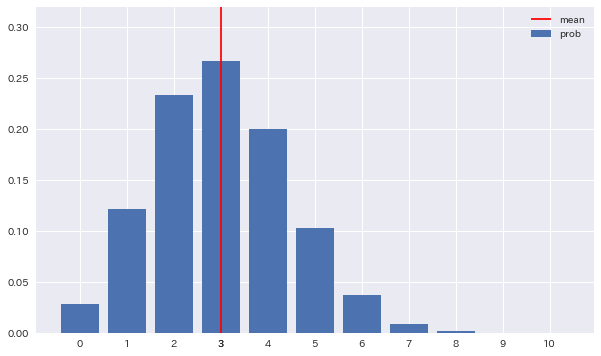

In [76]:
# Bin(10, 0.3)に従う確率変数Xを図示する
plot_prob(X)

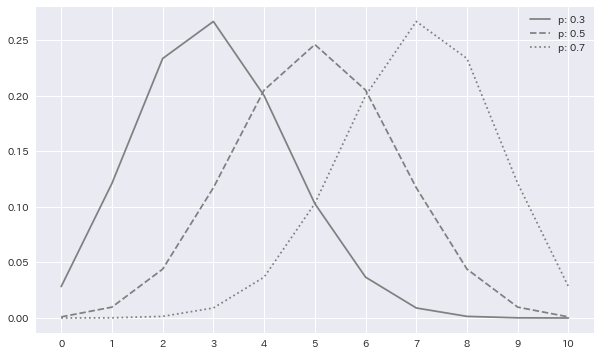

In [77]:
# scipy.statsのbinom()関数で
# 二項分布の確率変数を作成して、図示する
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(
        x_set, rv.pmf(x_set),
        label=f"p: {p}", ls=ls, color='gray'
    )
ax.set_xticks(x_set)
ax.legend()

plt.show()

In [78]:
# 図6.3: さまざまな二項分布
@interact(n=(1, 20, 1), p=(0.1, 0.9, 0.1))

def Bin(n=10, p=0.4):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    rv = stats.binom(n, p)
    x_set = np.arange(n+1)
    ax.plot(x_set, rv.pmf(x_set))
    ax.set_xticks(np.arange(21))
    ax.set_ylim(-0.02, 1)
    plt.show()

interactive(children=(IntSlider(value=10, description='n', max=20, min=1), FloatSlider(value=0.4, description=…

### 二項分布のまとめ

|||
|:--:|:--:|
|パラメータ|$n, p$|
|とりうる値|$\{0, 1, ..., n\}$|
|確率関数|${}_n C_x p^x (1 - p)^{(n - x)}$|
|期待値|$np$|
|分散|$np(1-p)$|
|scipy.stats|binom(n, p)|

## 6.3 幾何分布（geometric distribution）

- 幾何分布
  - ベルヌーイ試行を繰り返して、はじめて成功するまでの試行回数が従う確率分布
  - とりうる値は、1以上の整数全体 $\{1, 2, 3, ...\}$
- 幾何分布のパラメータ
  - ベルヌーイ試行の成功確率 $p$
  - $0 \leq p \leq 1$

### 幾何分布 $Ge(p)$ 確率関数

$$
f(x) = 
\begin{cases}
\begin{align*}
(1 - p)^{(x - 1)}p ~~~ &(x \in \{1, 2, 3, ...\})
\\
0 ~~~~~~~~~~~~~~~~~~~~~&(otherwise)
\end{align*}
\end{cases}
$$

#### コインを投げて、表が出るまでの回数

- $p=1/2$のベルヌーイ試行が、はじめて成功するまでの試行回数となるので、
- $Ge(1/2)$に従う。

コインを投げて、5回目ではじめて表が出る確率は、

$$
P(X = 5) = (1 - 1/2)^4 * 1/2 = 1/32
$$

と求めることができる。

#### サイコロを振って、出目6が出るまでの回数

- $p=1/6$のベルヌーイ試行が、はじめて成功するまでの試行回数となるので、
- $Ge(1/6)$に従う。

サイコロを振って、3回目ではじめて出目6が出る確率は、

$$
P(X = 3) = (1 - 1/6)^2 * 1/6 = 25/216
$$

と求めることができる。

### 幾何分布の期待値と分散

$X \sim Ge(p)$ とするとき、

$$
\begin{align*}
E(X) &= 1/p \\
V(X) &= (1 -p)/p^2
\end{align*}
$$

In [79]:
# 幾何分布のとりうる値は、1以上の整数すべてだが、
# x_setを1以上29以下の整数とする
def Ge(p):
    """幾何分布
    パラメータ(p)を引数に、x_setとfを返す関数
    """
    x_set = np.arange(1, 30)
    def f(x):
        """幾何分布の確率関数"""
        if x in x_set:
            return p * (1 - p)**(x-1)
        else:
            return 0
    return x_set, f

In [81]:
# 確率変数Xは、Ge(1/2)に従う
p = 0.5
X = Ge(p)
X

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <function __main__.Ge.<locals>.f(x)>)

In [82]:
# Ge(p)に従う、確率変数Xの
# 期待値 = 1/(1/2) = 2
# 分散 = (1-1/2) / (1/2)^2 = 2
check_prob(X)

期待値: 2.0
分散: 2.0


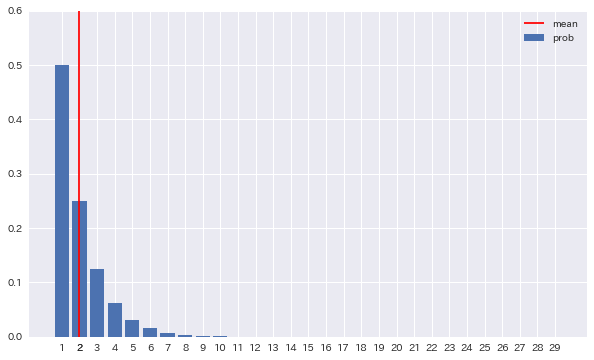

In [83]:
# Ge(p)に従う、確率変数Xを図示する
plot_prob(X)

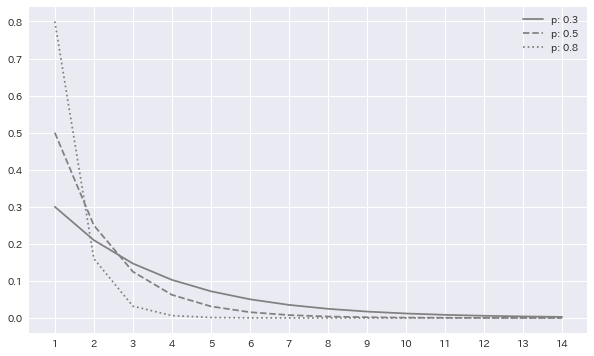

In [85]:
# scipy.stats.geom()関数で、幾何分布を作成して図示する
# パラメータp: (02, 0.5, 0.8)
# x_set: 1以上、14以下の整数
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.3, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(
        x_set, rv.pmf(x_set),
        label=f"p: {p}", ls=ls, color='gray'
    )
ax.set_xticks(x_set)
ax.legend()

plt.show()

In [86]:
# 図6.5: さまざまな幾何分布
@interact(p=(0.1, 0.9, 0.1))

def Ge(p=0.5):
    x_set = np.arange(1, 15)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set))
    ax.set_xticks(x_set)
    ax.set_ylim(-0.02, 1.02)
    plt.show()


interactive(children=(FloatSlider(value=0.5, description='p', max=0.9, min=0.1), Output()), _dom_classes=('wid…

### 幾何分布のまとめ

|||
|:--:|:--:|
|パラメータ|$p$|
|とりうる値|$\{0, 1, 2, 3, ...\}$|
|確率関数|$(1 - p)^{(x - 1)}p$|
|期待値|$1/p$|
|分散|$1-p / p^2$|
|scipy.stats|geom(p)|

## 6.4 ポアソン分布（Poisson distribution）

- ポアソン分布
  - ランダムな事象が単位時間あたりに発生する件数が従う確率分布
  - とりうる値は、$\{0, 1, 2, ...\}$
- ポアソン分布のパラメータ
  - $\lambda$ （正の実数）

### ポアソン分布 $Poi(\lambda)$ の確率関数

$$
f(x) = 
\begin{cases}
\begin{align*}
\dfrac{\lambda^x}{x!} \cdot e^{-\lambda} ~~~ &(x \in \{0, 1, 2, ...\})
\\
0 ~~~~~~~~~~~~~~ &(otherwise)
\end{align*}
\end{cases}
$$

#### 1日あたり平均2件の交通事故が発生する地域における、1日の交通事故の発生件数

- 交通事故を完全にランダムな事象と捉えると、
- 単位時間（1日）あたりに発生する交通事故の発生件数は、$Poi(2)$に従う。

この地域で1日に交通事故が、1件も起きない確率は、

$$
P(X =0) = \dfrac{2^0}{0!} \cdot e^{-2} \simeq 0.135
$$

と求めることができる。

#### 1時間あたり平均10アクセスあるサイトへの、1時間あたりのアクセス件数

- サイトへのアクセスを完全なランダムな事象と捉えると、
- 単位時間（1時間）あたりのサイトへのアクセス件数は、$Poi(10)$に従う。

1時間に15件アクセスがある確率は、

$$
P(X = 15) = \dfrac{10^{15}}{15!} \cdot ^{-10} \simeq 0.035
$$

と求めることができる。

### ポアソン分布の期待値と分散

$X \sim Poi(\lambda)$ とすると、

$$
\begin{align*}
E(X) &= \lambda \\
V(X) &= \lambda
\end{align*}
$$

In [88]:
# 階乗x!は、
# scipy.special.factorial()を使用する
from scipy.special import factorial

def Poi(lam):
    """ポアソン分布
    パラメータ(lam)を引数に、x_setとfを返す関数
    """
    x_set = np.arange(20)
    def f(x):
        """ポアソン分布の確率関数"""
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [89]:
# Poi(3)に従う、確率変数X
lam = 3
X = Poi(lam)
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <function __main__.Poi.<locals>.f(x)>)

In [90]:
# Poi(3)に従う、確率変数Xの
# 期待値, 分散 = 3.0
check_prob(X)

期待値: 3.0
分散: 3.0


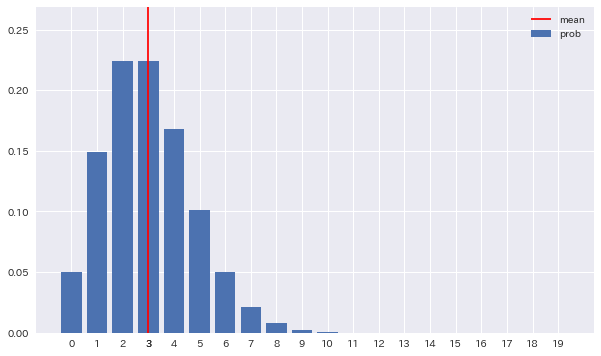

In [91]:
# Poi(3)に従う、確率変数Xを図示する
plot_prob(X)

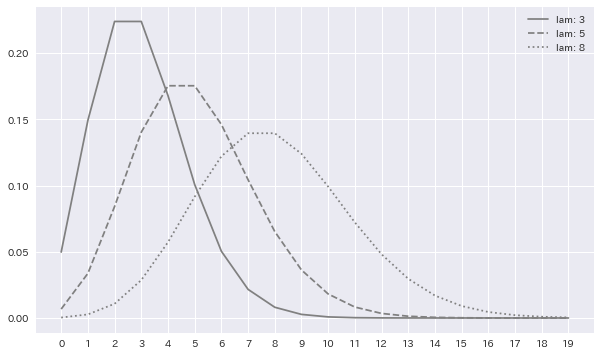

In [93]:
# scipy.stats.poisson()関数で、ポアソン分布を作成して図示する
# パラメータλ: (3, 5, 8)
# x_set: 1以上、14以下の整数
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(
        x_set, rv.pmf(x_set),
        label=f"lam: {lam}", ls=ls, color='gray'
    )
ax.set_xticks(x_set)
ax.legend()

plt.show()

In [94]:
# 図6.7 さまざまなポアソン分布
@interact(l=(1, 15, 1))

def Poi(l=8):
    x_set = np.arange(21)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    rv = stats.poisson(l)
    ax.plot(x_set, rv.pmf(x_set))
    ax.set_xticks(x_set)
    ax.set_ylim(-0.02, 0.4)
    plt.show()


interactive(children=(IntSlider(value=8, description='l', max=15, min=1), Output()), _dom_classes=('widget-int…

### ポアソン分布のまとめ

|||
|:--:|:--:|
|パラメータ|$\lambda$|
|とりうる値|$\{0, 1, 2, 3, ...\}$|
|確率関数|$\dfrac{\lambda^x}{x!} \cdot e^{-\lambda}$|
|期待値|$\lambda$|
|分散|$\lambda$|
|scipy.stats|poisson(λ)|